In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset and do primary study of data. Perform following steps: 
###  a. Reading some rows of dataset
### b. Learn data types of all features
###  c. See the statistical properties of the data.



In [2]:
# a. Reading some rows of dataset

data=pd.read_csv("C:/Users/admin pc/Downloads/emp_health.csv")
data.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [3]:
#b. Learn data types of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [4]:
# c. See the statistical properties of the data.'''
data.describe(include="all")

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
count,1338,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338,1338.000000
unique,1338,NaN,2,NaN,NaN,5,2,8,NaN
top,i10012,NaN,male,NaN,NaN,daily,no,east,NaN
freq,1,NaN,676,NaN,NaN,395,1064,262,NaN
mean,NaN,39.207025,NaN,30.663397,1.094918,NaN,NaN,NaN,13270.422265
std,NaN,14.049960,NaN,6.098187,1.205493,NaN,NaN,NaN,12110.011237
min,NaN,18.000000,NaN,15.960000,0.000000,NaN,NaN,NaN,1121.873900
25%,NaN,27.000000,NaN,26.296250,0.000000,NaN,NaN,NaN,4740.287150
50%,NaN,39.000000,NaN,30.400000,1.000000,NaN,NaN,NaN,9382.033000
75%,NaN,51.000000,NaN,34.693750,2.000000,NaN,NaN,NaN,16639.912515


### 1. How many employees above 50 age smoke, what is their average expenditure on health management?


In [5]:
data[(data["age"]>50) & (data["smoke"]=="yes")].count()["id"]


64

In [6]:
df=data[(data["age"]>50) & (data["smoke"]=="yes")]
df["expenditure"].mean()

38820.22308234376


### 64 employees above 50 age smoke, Thier average expenditure on health management is 38820.22308234376

### 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [7]:
df1=data[(data["sex"]=="female") & (data["alcohol"]!="daily")].count()["id"]
df1


453

In [8]:
df2=data[data["sex"]=="female"].count()["id"]
df2

662

In [9]:
proportion=(df1/df2)*100
print(round(proportion,2))

68.43


453 female employees did not consume alcohol daily. The proportion with respect to total female employees and female employees did not consume alcohol daily is 68.43.

### 3. Display zone wise average expenditure of employees on health


In [10]:
df=data.groupby("zone")["expenditure"].mean()

In [11]:
df_=pd.DataFrame(df)
df_

,expenditure
zone,
east,13774.679941
north,14102.583403
northeast,13694.721724
northwest,12151.702619
south,14715.689519
southeast,14452.949680
southwest,12717.083869
west,12182.998872


###  4. Employees of which zone did maximum expenditure on health

In [12]:
x=data.groupby("zone")["expenditure"].sum()
x

zone
east         3.608966e+06
north        9.871808e+05
northeast    1.013409e+06
northwest    1.761997e+06
south        1.236118e+06
southeast    2.861684e+06
southwest    3.191988e+06
west         3.094482e+06
Name: expenditure, dtype: float64

In [13]:
xdf=pd.DataFrame(x)
xdf.sort_values(ascending=False,by="expenditure").iloc[0]

expenditure    3.608966e+06
Name: east, dtype: float64

 ### Employees of east zone did maximum expenditure on health

###  5. What is the minimum expenditure done by any employee in organization


In [14]:
data["expenditure"].min()

1121.8739

### The minimum expenditure done by any employee in organization is 1121.8739


### 6. What is average expenditure of employees who have 2 or lesser dependents..?

In [15]:
ddf=data[data["dependent"]<=2]
print(round(ddf["expenditure"].mean(),2))

13040.97


### The average expenditure of employees who have 2 or lesser dependents is 13040.97

### 7. How many employees are below age of 20 years. What is their average BMI...?


In [16]:
a=data[data["age"]<20]
print(a["id"].count())
print(round(a["bmi"].mean(),2))

137
29.97


###  137 employees are below age of 20 years. Their average BMI is 29.97


###  8. Create a dataframe "non_smoker" for all non-smoker male employees...? 


In [17]:
y=data[(data["smoke"]=="no")& (data["sex"]=="male")]
new_df=pd.DataFrame(y)
new_df

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


In [18]:
data.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


### 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol


In [19]:
df=data[(data["alcohol"]=="no")& (data["sex"]=="male")]
new_df1=pd.DataFrame(df)
new_df1

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


In [20]:
data["alcohol"].value_counts()

alcohol
daily      395
weekend    347
party      278
no         259
rarely      59
Name: count, dtype: int64

In [21]:
non_smoking_alcoholic=data[(data["sex"]=="male")&(data["alcohol"]=="no")&(data["smoke"]=="no")]


### 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol..?


In [22]:
df=data[(data["sex"]=="male")&(data["smoke"]=="no")&(data["alcohol"]=="no")]
new_df2=pd.DataFrame(df)
new_df2


,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
67,i10079,40,male,26.315,1,no,no,northwest,6389.37785
...,...,...,...,...,...,...,...,...,...
1261,i11273,28,male,37.100,1,no,no,southwest,3277.16100
1270,i11282,26,male,33.915,1,no,no,west,3292.52985
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


###  11.What is the count for each zone with respect to number of dependent


In [23]:
new_data=data.groupby(["zone","dependent"])["id"].count()
new_data=pd.DataFrame(new_data)
new_data

id
zone      dependent     
east      0          124
          1           65
          2           42
          3           22
          4            6
          5            3
north     0           26
          1           20
          2           10
          3           12
          4            1
          5            1
northeast 0           35
          1            9
          2           15
          3           13
          4            2
northwest 0           70
          1           28
          2           30
          3           13
          4            4
south     0           38
          1           21
          2           12
          3           12
          4            1
southeast 0           81
          1           57
          2           38
          3           15
          4            2
          5            5
southwest 0          116
          1           53
          2           44
          3           25
          4            6
          5            7
west      0           84
          1           71
          2           49
          3           45
          4            3
          5            2

###  12. Classify the employees into 3 categories.
###  Category 1 : employees below 18.5 bmi - underweight
### Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
### Category 3 : employee with bmi over 24.9 - overweight
### What is the average expenditure of employees in each category.
### Display the bar chart for the same


In [ ]:
category1=data[data["bmi"]<18.5]
category1["category"]="underweight"

In [ ]:
category2=data[data["bmi"].isin([18.5,24.9])]
category2["category"]="fit"

In [ ]:
category3=data[data["bmi"]>24.9]
category3["category"]="overweight"

In [27]:
data1=pd.concat([category1,category2,category3],axis=0)
data1

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,category
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215,underweight
128,i10140,32,female,17.765,2,weekend,yes,northwest,32734.18630,underweight
172,i10184,18,male,15.960,0,party,no,north,1694.79640,underweight
198,i10210,51,female,18.050,0,weekend,no,northwest,9644.25250,underweight
232,i10244,19,female,17.800,0,party,no,southwest,1727.78500,underweight
...,...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830,overweight
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080,overweight
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350,overweight
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500,overweight


###  The average expenditure of employees in each category.

In [28]:
dt=data1.groupby("category")["expenditure"].mean()
dt

category
fit             4766.022000
overweight     13936.616823
underweight     8852.200585
Name: expenditure, dtype: float64

### The bar chart for the same


[Text(0.5, 0, 'category'), Text(0, 0.5, 'average_expenditure')]

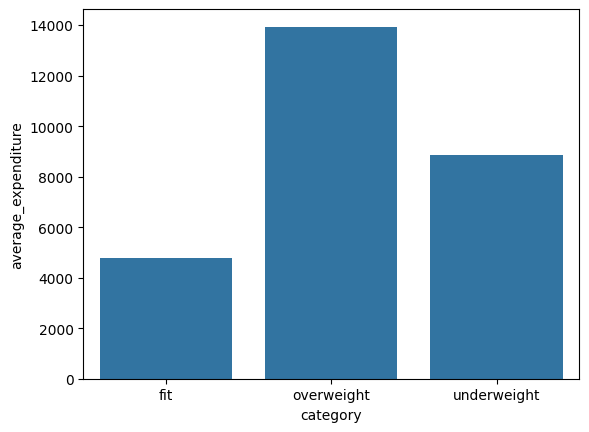

In [29]:
bar=sns.barplot(dt)
bar.set(xlabel="category",ylabel="average_expenditure")

### 13. Draw line plot of expenditure against age and BMI


<Axes: xlabel='age', ylabel='expenditure'>

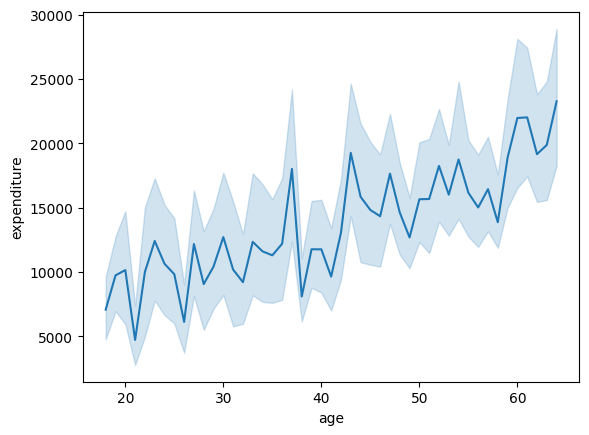

In [30]:
sns.lineplot(data=data,y=data["expenditure"],x=data["age"])

###  14. Draw a bar chart to show zone wise average expenditure

In [31]:
dat1=data.groupby("zone")["expenditure"].mean()
dat1

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

[Text(0.5, 0, 'Zone'), Text(0, 0.5, 'average_expenditure')]

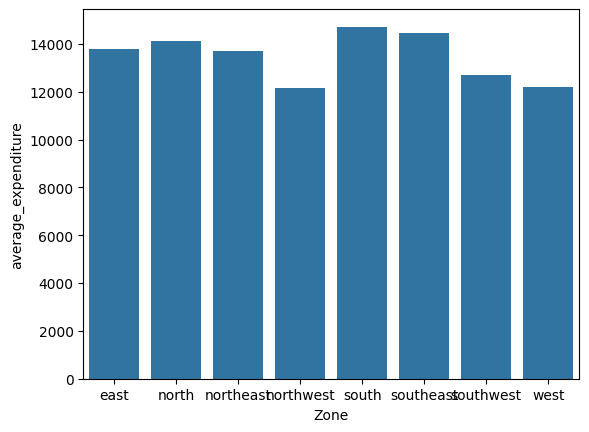

In [32]:
s=sns.barplot(data=dat1)
s.set(xlabel="Zone",ylabel="average_expenditure")

### 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure
. 

In [33]:
data_=data.groupby(["alcohol","smoke"])["expenditure"].mean()
data_=pd.DataFrame(data_)
data_

expenditure
alcohol smoke              
daily   no      8462.115558
        yes    31160.402608
no      no      8628.618182
        yes    32224.657378
party   no      8295.247250
        yes    31487.938163
rarely  no      5785.022944
        yes    31881.367379
weekend no      8784.631185
        yes    33592.294629

[Text(0, 0.5, 'average_expenditure')]

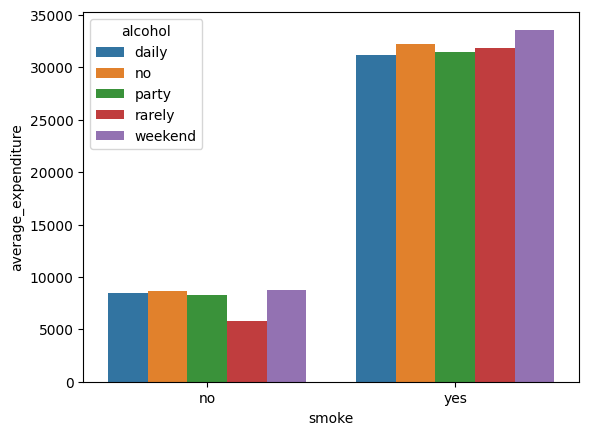

In [34]:
s=sns.barplot(data_,x="smoke",y="expenditure",hue="alcohol")
s.set(ylabel="average_expenditure")

In [35]:
data["alcohol"].value_counts().index

Index(['daily', 'weekend', 'party', 'no', 'rarely'], dtype='object', name='alcohol')

###  16. Draw pie chart for alcohol consumption habits


([<matplotlib.patches.Wedge at 0x25ed58a21e0>,
 [Text(0.6598631335250115, 0.8801026332278259, 'daily'),
  Text(-0.9797551770757736, 0.5000797866273137, 'weekend'),
  Text(-0.5984529219141539, -0.9229594250303812, 'party'),
  Text(0.6964591150961473, -0.8514368449858696, 'no'),
  Text(1.089461966245801, -0.15189675475082812, 'rarely')],
 [Text(0.35992534555909717, 0.48005598176063224, '29.5%'),
  Text(-0.5344119147686037, 0.2727707927058074, '25.9%'),
  Text(-0.3264288664986294, -0.5034324136529351, '20.8%'),
  Text(0.37988679005244397, -0.4644200972650197, '19.4%'),
  Text(0.5942519815886187, -0.08285277531863351, '4.4%')])

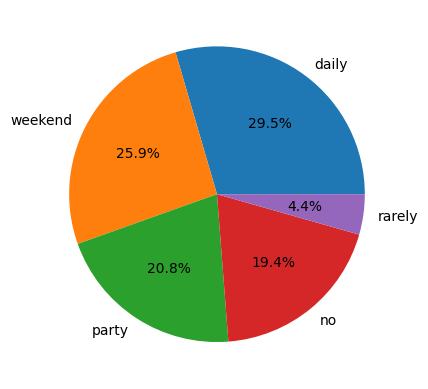

In [36]:
plt.pie(data["alcohol"].value_counts(),autopct="%0.1f%%",labels=data["alcohol"].value_counts().index)


###  17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue


<Axes: xlabel='age', ylabel='expenditure'>

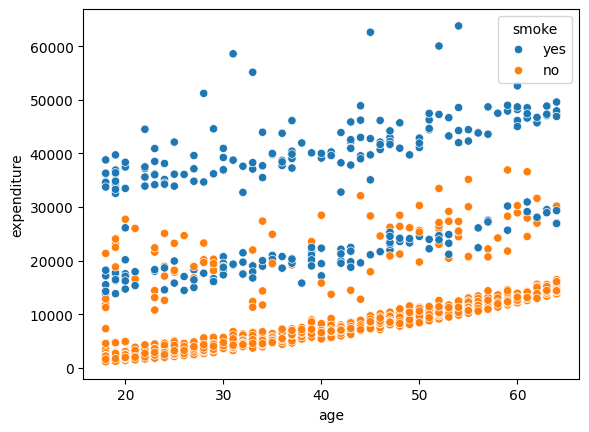

In [37]:
sns.scatterplot(data=data,x="age",y="expenditure",hue="smoke")


###  18. Draw distribution plot of expenditure


C:\Users\admin pc\AppData\Local\Temp\ipykernel_17660\3808767963.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["expenditure"])


<Axes: xlabel='expenditure', ylabel='Density'>

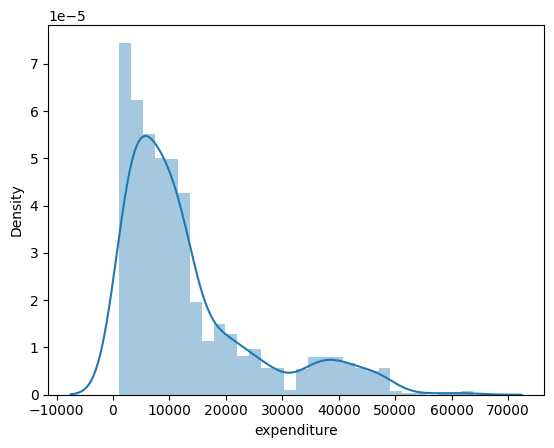

In [38]:
sns.distplot(data["expenditure"])

### 19. Display the pairplot



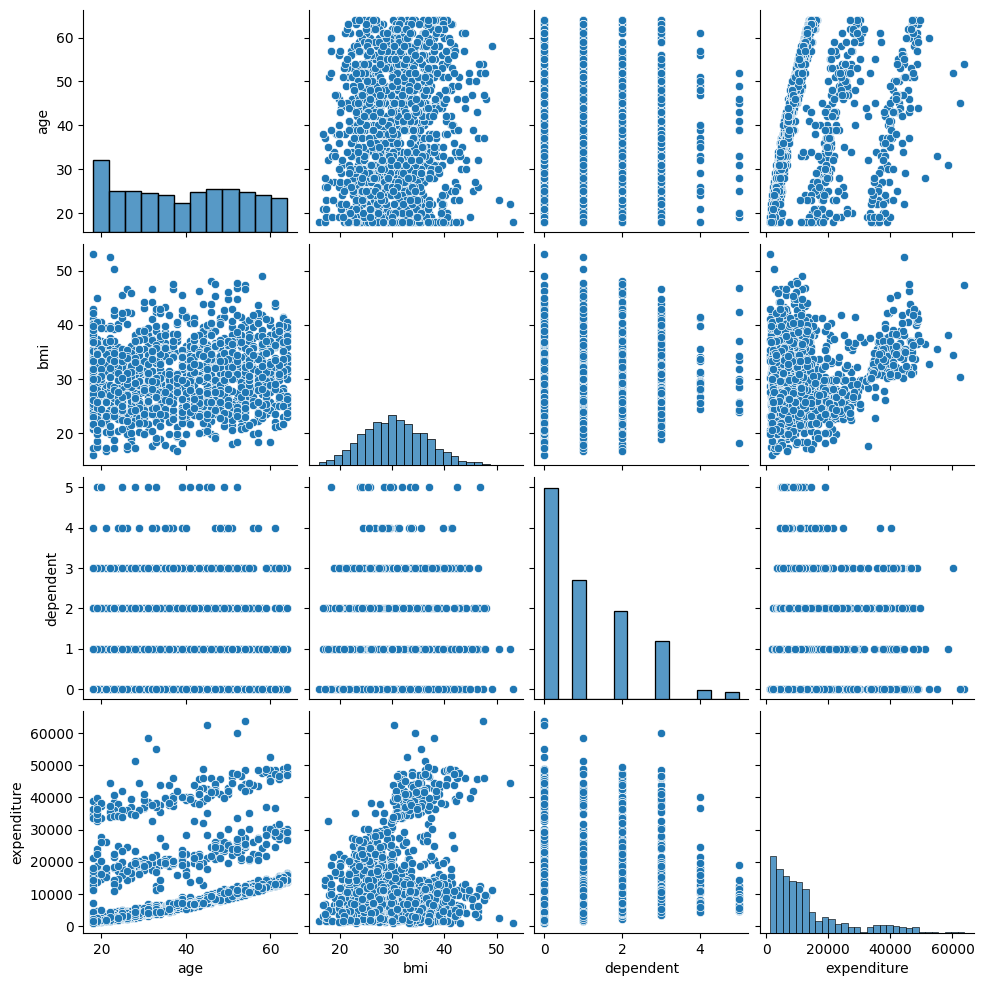

In [39]:
sns.pairplot(data)